# PRACTICAL NO. 3
# DATA WRANGLING II

Operations using Python. (e.g., Academic_Performance.csv)
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them(using mean and mode).Apply for single column and whole dataset.
2. Scan all numeric variables for outliers. If there are outliers,any of the
suitable techniques to deal with them.(using z score)
3. Display and Remove the outliers
4. Apply data transformations on at least one of the variables Create bins
and Labels.
5. Draw box plot

# **1**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('datasets/AcademicPerformance_New.csv')

In [30]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [32]:
df['WT'].fillna(df['WT'].mean(), inplace=True)
df['DSBDA'].fillna(df['DSBDA'].mean(), inplace=True)
df['AI'].fillna(df['DSBDA'].mean(), inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_16376\709877744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WT'].fillna(df['WT'].mean(), inplace=True)
C:\Users\ganes\AppData\Local\Temp\ipykernel_16376\709877744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [33]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.000000,72.000000,74.000000,72.666667,C,Yes
1,2.0,Japan,69.000000,90.000000,64.652632,53.000000,B,No
2,NaN,NaN,61.164835,64.652632,64.652632,NaN,NaN,NaN
3,4.0,China,47.000000,64.652632,44.000000,30.333333,D,Yes
4,5.0,India,76.000000,78.000000,64.652632,51.333333,C,No


In [34]:
df.dropna(subset=['Roll No'],inplace=True)

In [35]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.000000,74.000000,72.666667,C,Yes
1,2.0,Japan,69.0,90.000000,64.652632,53.000000,B,No
3,4.0,China,47.0,64.652632,44.000000,30.333333,D,Yes
4,5.0,India,76.0,78.000000,64.652632,51.333333,C,No
5,6.0,Japan,71.0,83.000000,78.000000,77.333333,C,Yes


### checking for incosistencies: wrong_formatting, out_of_range values, duplicate entries, invalid datatypes

In [36]:
df.duplicated().sum()

0

In [37]:
df['Roll No'].astype(int)

0      1
1      2
3      4
4      5
5      6
      ..
94    95
95    96
96    97
97    98
98    99
Name: Roll No, Length: 98, dtype: int32

# **2 and 3**

In [38]:
df['WT_z'] = (df['WT']-df['WT'].mean())/df['WT'].std()
df[((df['WT_z'] < -2.5) | (df['WT_z'] > 2.5))]

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,WT_z
17,18.0,Rassia,18.0,32.0,28.0,26.0,D,Yes,-2.988464


In [39]:
df = df[~((df['WT_z'] < -2.5) | (df['WT_z'] > 2.5))]

In [40]:
df['DSBDA_z'] = (df['DSBDA']-df['DSBDA'].mean())/df['DSBDA'].std()
df[((df['DSBDA_z'] < -2.5) | (df['DSBDA_z'] > 2.5))]

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,WT_z,DSBDA_z
76,77.0,USA,30.0,26.0,22.0,26.0,D,Yes,-2.157658,-2.716761


In [41]:
df = df[~((df['DSBDA_z'] < -2.5) | (df['DSBDA_z'] > 2.5))]

In [42]:
df['AI_z'] = (df['AI']-df['AI'].mean())/df['AI'].std()
df[((df['AI_z'] < -2.5) | (df['DSBDA_z'] > 2.5))]

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,WT_z,DSBDA_z,AI_z
59,60.0,Rassia,70.0,50.0,20.0,46.666667,D,Yes,0.611692,-1.044447,-2.957371


In [43]:
df = df[~((df['AI_z'] < -2.5) | (df['DSBDA_z'] > 2.5))]

In [44]:
# Deleting all extra columns
df.drop(['WT_z','AI_z','DSBDA_z'], axis=1, inplace=True)

# 4 and 5

In [45]:
bins = [0, 40, 60, 80, 100]
labels = ['Low', 'Average', 'Good', 'Excellent']
df['Performance_Level'] = pd.cut(df['Average'], bins=bins, labels=labels, right=False)

In [46]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,Performance_Level
0,1.0,India,72.0,72.000000,74.000000,72.666667,C,Yes,Good
1,2.0,Japan,69.0,90.000000,64.652632,53.000000,B,No,Average
3,4.0,China,47.0,64.652632,44.000000,30.333333,D,Yes,Low
4,5.0,India,76.0,78.000000,64.652632,51.333333,C,No,Average
5,6.0,Japan,71.0,83.000000,78.000000,77.333333,C,Yes,Good


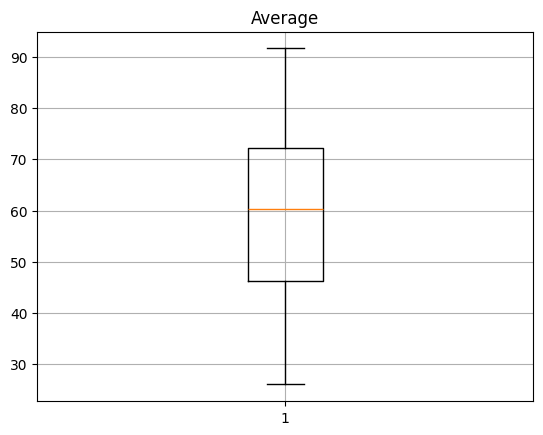

In [47]:
plt.boxplot(df['Average'])
plt.title('Average')
plt.grid(True)
plt.show()